In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
import xlsxwriter
import os

In [4]:
xls = pd.ExcelFile(r'C:\Users\thinkpad\Desktop\$AAL.xlsx')
all_data = pd.read_excel(xls, header = 0,encoding='latin-1')

### Remove the last row for each cashtag, since its 'Predicted_change' is  NaN

In [5]:
all_data = all_data[np.isfinite(all_data['Predicted_change_stock'])]
all_data = all_data[np.isfinite(all_data['Buy/Sell'])]

In [6]:
nan_rows = all_data[all_data['Predicted_change_stock'].isnull()]
nan_rows

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell


In [7]:
len(all_data)

74

In [8]:
all_data.describe()

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell
count,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,9.740346e+06,33.899230,2.874843,-0.447087,0.022178,1.862668,2.952834,4150.431300,1448.351406,0.142377,0.020247,0.489876,0.510124,298.226792,-0.007523,-0.488144,-0.243243
std,3.134140e+06,3.327322,1.002155,1.512450,0.860596,1.370148,3.562513,4441.916823,1505.466243,0.112095,0.122702,0.061351,0.061351,2456.107859,0.063413,1.581633,0.976586
min,5.018200e+06,29.919750,1.377271,-5.089362,-2.619312,1.000000,1.000000,708.542857,323.734375,0.000000,-0.258298,0.357660,0.370851,-5828.232189,-0.165698,-5.089362,-1.000000
25%,7.338450e+06,31.002536,2.066362,-1.211461,-0.412757,1.031250,1.175000,1954.245830,694.388824,0.062500,-0.080477,0.444980,0.459762,-731.846659,-0.034118,-1.211461,-1.000000
50%,9.032517e+06,32.129019,2.778289,-0.418915,0.038208,1.527778,1.884034,2978.044151,1025.941311,0.115348,0.028730,0.485635,0.514365,52.550113,-0.013866,-0.418915,-1.000000
75%,1.160547e+07,37.335455,3.514020,0.482330,0.551023,2.110417,2.966336,4399.806767,1465.167749,0.189153,0.110040,0.540238,0.555020,516.272916,-0.001894,0.482330,1.000000
max,2.093950e+07,40.029770,5.686162,3.565896,2.305596,10.125000,25.835616,29033.316129,10707.666667,0.500000,0.284681,0.629149,0.642340,15064.395659,0.373714,3.565896,1.000000


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2016-04-01 to 2016-06-13
Data columns (total 17 columns):
Volume_stock                  74 non-null float64
Adj_Close_stock               74 non-null float64
HiLo_vola_stock               74 non-null float64
Pct_change_stock              74 non-null float64
Pct_change_stock_scaled       74 non-null float64
Favs                          74 non-null float64
RTs                           74 non-null float64
Followers                     74 non-null float64
Following                     74 non-null float64
Is a RT                       74 non-null float64
compound                      74 non-null float64
neg                           74 non-null float64
pos                           74 non-null float64
Compound_multiplied           74 non-null float64
Compound_multiplied_scaled    74 non-null float64
Predicted_change_stock        74 non-null float64
Buy/Sell                      74 non-null float64
dtypes: float64(17)
memory 

E:\Anacod\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


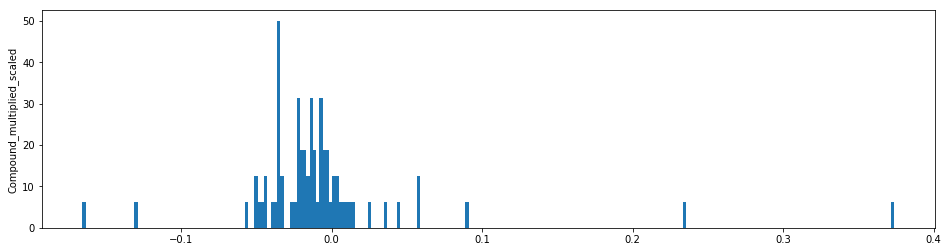

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
x = all_data['Compound_multiplied_scaled'] 
plt.hist(x, normed=True, bins=250)
plt.ylabel('Compound_multiplied_scaled'); 


### Train - Test split and Multiple Input Test split

In [11]:
x = np.array(all_data[['Compound_multiplied_scaled']]) 
y = np.array(all_data['Buy/Sell'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

def to_multiple_input_data_set(data_set, k):
    result = []
    for i in range(k-1):
        tmp = data_set[0:i+1]
        for j in range(k-i-1):
            tmp = np.insert(tmp, 0, 0, 0)
        result.append(tmp.reshape(k))
    for i in range(len(data_set)-k+1):
        tmp = data_set[i:i+k]
        result.append(tmp.reshape(k))
    return np.array(result)

x_train_multiple_input = to_multiple_input_data_set(x_train, 3)
x_test_multiple_input = to_multiple_input_data_set(x_test, 3)
print x_train_multiple_input   

[[ 0.          0.         -0.02749721]
 [ 0.         -0.02749721 -0.02317717]
 [-0.02749721 -0.02317717 -0.00043858]
 [-0.02317717 -0.00043858 -0.04335019]
 [-0.00043858 -0.04335019 -0.03665198]
 [-0.04335019 -0.03665198 -0.00444333]
 [-0.03665198 -0.00444333 -0.01205141]
 [-0.00444333 -0.01205141 -0.00322023]
 [-0.01205141 -0.00322023  0.0247702 ]
 [-0.00322023  0.0247702   0.00361424]
 [ 0.0247702   0.00361424 -0.01818925]
 [ 0.00361424 -0.01818925 -0.01972978]
 [-0.01818925 -0.01972978  0.01341419]
 [-0.01972978  0.01341419  0.05723851]
 [ 0.01341419  0.05723851 -0.00186356]
 [ 0.05723851 -0.00186356  0.05750155]
 [-0.00186356  0.05750155 -0.01504023]
 [ 0.05750155 -0.01504023 -0.00788606]
 [-0.01504023 -0.00788606 -0.04978568]
 [-0.00788606 -0.04978568 -0.01842428]
 [-0.04978568 -0.01842428 -0.0361076 ]
 [-0.01842428 -0.0361076  -0.0341711 ]
 [-0.0361076  -0.0341711  -0.03546208]
 [-0.0341711  -0.03546208 -0.03588885]
 [-0.03546208 -0.03588885 -0.00721294]
 [-0.03588885 -0.00721294

### KNN - K-Nearest-Neighbors

In [12]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 
print neigh.score( x_test, y_test)

neigh_multiple_input = KNeighborsClassifier(n_neighbors=5)
neigh_multiple_input.fit(x_train_multiple_input, y_train) 
print neigh_multiple_input.score( x_test_multiple_input, y_test)

0.8
0.4


#### Accuracy after cross validation 

In [13]:
neigh_cv = cross_val_score(neigh, x_train, y_train, cv=10) 
print(neigh_cv.mean()) 

neigh_cv_multiple_input = cross_val_score(neigh_multiple_input, x_train_multiple_input, y_train, cv=10) 
print(neigh_cv_multiple_input.mean()) 

0.44238095238095243
0.5933333333333333


### Logistic Regression

In [14]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
print logreg.score( x_test, y_test)

logreg_multiple_input = LogisticRegression(random_state=42)
logreg_multiple_input.fit(x_train_multiple_input, y_train)
print logreg_multiple_input.score( x_test_multiple_input, y_test)

0.6
0.6


E:\Anacod\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Accuracy after cross validation 

In [15]:
logreg_cv = cross_val_score(logreg, x_train, y_train, cv=10)
print(logreg_cv.mean())

logreg_cv_multiple_input = cross_val_score(logreg_multiple_input, x_train_multiple_input, y_train, cv=10)
print(logreg_cv_multiple_input.mean())

0.6276190476190475
0.6276190476190475


### Support Vector Machines (SVM) with linear kernel
#### kernel = 'linear'

In [16]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(x_train, y_train)
print svm_linear.score(x_test, y_test)

svm_linear_multiple_input = SVC( kernel = 'linear')
svm_linear_multiple_input.fit(x_train_multiple_input, y_train)
print svm_linear_multiple_input.score(x_test_multiple_input, y_test)

0.6
0.6


#### Accuracy for 'linear' after cross validation

In [17]:
svm_linear_cv = cross_val_score(svm_linear, x_train, y_train, cv=10)
print(svm_linear_cv.mean())

svm_linear_cv_multiple_input = cross_val_score(svm_linear_multiple_input, x_train_multiple_input, y_train, cv=10)
print(svm_linear_cv_multiple_input.mean())

0.6276190476190475
0.6276190476190475


### Naive Bayes

In [18]:
scaler = MinMaxScaler() 
X_minmax = scaler.fit_transform(x_train)

mnb = MultinomialNB()

#### Accuracy after cross validation

In [19]:
mnb_cv = cross_val_score(mnb, X_minmax, y_train, cv=10) # uscaled data accuracy same;  6588046192259676
print(mnb_cv.mean())

0.6276190476190475


### Decision Tree

In [20]:
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train) 
print dtc.score(x_test, y_test)

dtc_multiple_input = tree.DecisionTreeClassifier()
dtc_multiple_input.fit(x_train_multiple_input, y_train) 
print dtc_multiple_input.score(x_test_multiple_input, y_test)

0.5333333333333333
0.3333333333333333


#### Accuracy after cross validation

In [21]:
dtc_cv = cross_val_score(dtc, x_train, y_train, cv=10) 
print(dtc_cv.mean())

dtc_cv_multiple_input = cross_val_score(dtc_multiple_input, x_train_multiple_input, y_train, cv=10) 
print(dtc_cv_multiple_input.mean())

0.4852380952380952
0.5109523809523809


### Random Forest


In [22]:
forest_reg = RandomForestClassifier(random_state=42)
forest_reg.fit(x_train, y_train)
print forest_reg.score(x_test, y_test)

forest_reg_multiple_input = RandomForestClassifier(random_state=42)
forest_reg_multiple_input.fit(x_train_multiple_input, y_train)
print forest_reg_multiple_input.score(x_test_multiple_input, y_test)

0.5333333333333333
0.6


E:\Anacod\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Accuracy after cross validation

In [23]:
forest_reg_cv = cross_val_score(forest_reg, x_train, y_train, cv=10) 
print(forest_reg_cv.mean()) 

forest_reg_cv_multiple_input = cross_val_score(forest_reg_multiple_input, x_train_multiple_input, y_train, cv=10) 
print(forest_reg_cv_multiple_input.mean())  

0.47095238095238096
0.5257142857142857


## Results Summary

In [24]:
print("KNN: \t\t\t", neigh_cv.mean())
print("Logistic Regression: \t", logreg_cv.mean())
print("SVM linear: \t\t", svm_linear_cv.mean())
print("Naive Bayes: \t\t", mnb_cv.mean())
print("Decision Tree: \t\t", dtc_cv.mean())
print("Random Forest: \t\t", forest_reg_cv.mean())
print("\n")
print("KNN(Multiple Input): \t\t\t", neigh_cv_multiple_input.mean())
print("Logistic Regression(Multiple Input): \t", logreg_cv_multiple_input.mean())
print("SVM linear(Multiple Input): \t\t", svm_linear_cv_multiple_input.mean())
print("Decision Tree(Multiple Input): \t\t", dtc_cv_multiple_input.mean())
print("Random Forest(Multiple Input): \t\t", forest_reg_cv_multiple_input.mean())

('KNN: \t\t\t', 0.44238095238095243)
('Logistic Regression: \t', 0.6276190476190475)
('SVM linear: \t\t', 0.6276190476190475)
('Naive Bayes: \t\t', 0.6276190476190475)
('Decision Tree: \t\t', 0.4852380952380952)
('Random Forest: \t\t', 0.47095238095238096)


('KNN(Multiple Input): \t\t\t', 0.5933333333333333)
('Logistic Regression(Multiple Input): \t', 0.6276190476190475)
('SVM linear(Multiple Input): \t\t', 0.6276190476190475)
('Decision Tree(Multiple Input): \t\t', 0.5109523809523809)
('Random Forest(Multiple Input): \t\t', 0.5257142857142857)


In [25]:
mean_result = [neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(),mnb_cv.mean(),dtc_cv.mean(), forest_reg_cv.mean(),neigh_cv_multiple_input.mean(), logreg_cv_multiple_input.mean(), svm_linear_cv_multiple_input.mean(),dtc_cv_multiple_input.mean(), forest_reg_cv_multiple_input.mean()]
print mean_result

[0.44238095238095243, 0.6276190476190475, 0.6276190476190475, 0.6276190476190475, 0.4852380952380952, 0.47095238095238096, 0.5933333333333333, 0.6276190476190475, 0.6276190476190475, 0.5109523809523809, 0.5257142857142857]


In [26]:
results = {'0': ['KNN', 'LogReg', 'SVM linear', 'Naive Bayes', 'Decision Tree', 'Random Forest','KNN(Multiple Input)', 'LogReg(Multiple Input)', 'SVM linear(Multiple Input)','Decision Tree(Multiple Input)', 'Random Forest(Multiple Input)'],
          '1':mean_result}
print len(results['0'])
print len(results['1'])


11
11


In [27]:
summary = pd.DataFrame.from_dict(results)
summary = summary.transpose()
summary = summary.rename(index = {'0':'Model', '1':'AAL'}) # Update cashtag!

In [28]:
summary

,0,1,2,3,4,5,6,7,8,9,10
Model,KNN,LogReg,SVM linear,Naive Bayes,Decision Tree,Random Forest,KNN(Multiple Input),LogReg(Multiple Input),SVM linear(Multiple Input),Decision Tree(Multiple Input),Random Forest(Multiple Input)
AAL,0.442381,0.627619,0.627619,0.627619,0.485238,0.470952,0.593333,0.627619,0.627619,0.510952,0.525714


### Save the result from each classifier for this cashtag  in an excel
The results are used for creating an overall summary for each cashtag and classifier.

In [29]:
# import xlsxwriter
# import os

writer_df = pd.ExcelWriter('summary.xlsx', engine='xlsxwriter')
summary.to_excel(writer_df)
writer_df.save()

os.rename('summary.xlsx', 'AAL_summary.xlsx') # Update cashtag!

### Add Prediction

In [35]:
all_data = pd.read_excel(xls, header = 0,encoding='latin-1')
x1 = np.array(all_data['Compound_multiplied_scaled'])
x = x1.reshape((len(x1), 1))
x_multiple_input = to_multiple_input_data_set(x1, 3)
all_data['KNN'] = neigh.predict(x)
all_data['LogReg'] = logreg.predict(x)
all_data['SVM linear'] = svm_linear.predict(x)
all_data['Decision Tree'] = dtc.predict(x)
all_data['Random Forest'] = forest_reg.predict(x)
all_data['KNN(Multiple Input)'] = neigh_multiple_input.predict(x_multiple_input)
all_data['LogReg(Multiple Input)'] = logreg_multiple_input.predict(x_multiple_input)
all_data['SVM linear(Multiple Input)'] = svm_linear_multiple_input.predict(x_multiple_input)
all_data['Decision Tree(Multiple Input)'] = dtc_multiple_input.predict(x_multiple_input)
all_data['Random Forest(Multiple Input)'] = forest_reg_multiple_input.predict(x_multiple_input)
all_data = all_data[['Compound_multiplied_scaled', 'Buy/Sell', 'KNN', 'LogReg', 'SVM linear', 'Decision Tree','Random Forest', 'KNN(Multiple Input)', 'LogReg(Multiple Input)', 'SVM linear(Multiple Input)', 'Decision Tree(Multiple Input)','Random Forest(Multiple Input)' ]]
all_data.head(10)

,Compound_multiplied_scaled,Buy/Sell,KNN,LogReg,SVM linear,Decision Tree,Random Forest,KNN(Multiple Input),LogReg(Multiple Input),SVM linear(Multiple Input),Decision Tree(Multiple Input),Random Forest(Multiple Input)
2016-04-01,-0.033959,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2016-04-02,-0.043138,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2016-04-03,0.089356,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2016-04-04,-0.035462,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2016-04-05,0.000702,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
2016-04-06,-0.001984,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2016-04-07,-0.007124,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2016-04-08,-0.018189,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2016-04-09,-0.056560,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2016-04-10,0.002535,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
